# Grouping of Goldman Sach Indices Using Cluster/Principal Component Analysis

Principal Components:
[[-0.00607883 -0.01863453  0.00114865]
 [-0.0022235  -0.00491295 -0.00436849]
 [-0.00136026  0.00518916 -0.00813693]
 ...
 [ 0.00837559 -0.00501499 -0.00587899]
 [-0.01145652  0.0105638  -0.00484491]
 [-0.00888542  0.00504468  0.00064923]]


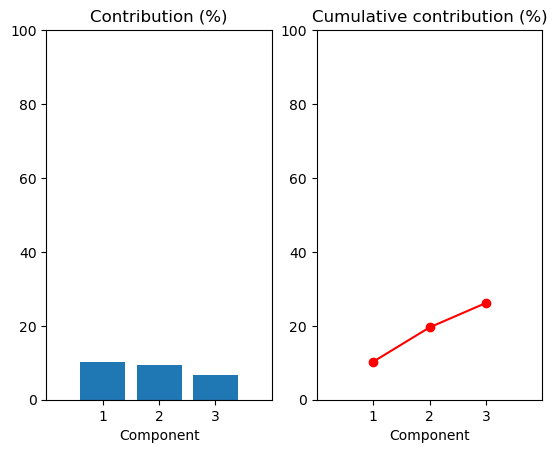

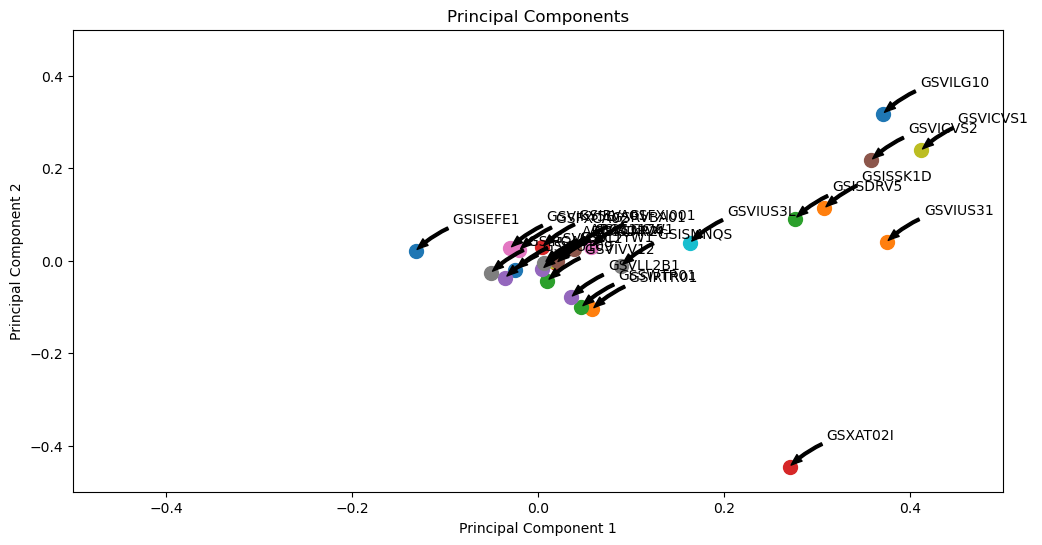

In [10]:
import numpy as n
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

gsfactors = pd.read_csv('gsreturnsnodatenonan_altered.csv')

X = gsfactors.iloc[:,:-1].values
y = gsfactors.iloc[:,-1].values

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

print("Principal Components:")
print(principalComponents)

pct = pca.explained_variance_ratio_
pca_components = pca.components_

cum_pct = n.cumsum(pct)
x = n.arange(1,len(pct)+1,1)
plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])
plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

# Plot principal components
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    ax.scatter(x, y, marker='o', s=100)
    ax.annotate(gsfactors.columns[i], xy=(x, y), xytext=(x+0.04, y+0.06),
                arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=6, headlength=8, connectionstyle='arc3,rad=0.1'))

ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Principal Components')
plt.show()
